#### CANADIAN FEDERAL ELECTION
Canada is a developed country with about 38 million people, and the Parliament of Canada is the federal legislature of Canada. The chosen dataset is the federal election statistics from the year 1867 to 2021which is collected from various sources. There are 31 variables in this dataset which includes the candidates details, party information, occupation, the years they are elected and other important information. Few important studies we need to carry out in this project are,

( - ) To understand the trends of political diversity of Canadian politics over the time.

( - ) The role of the province on the candidate and the party.

( - ) Gender variation affecting the election.

( - ) Effect of Incumbency on the member.

( - ) Frequency of candidates running for the same position.

( - ) Trends of the same party elected several times.
After understanding these trends, we can make a model to predict the chance of winning a candidate in the coming elections.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the dataset
df=pd.read_csv("federal-candidates-2021-10-20.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_19288\2884330665.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("federal-candidates-2021-10-20.csv")


In [3]:
## show the maximum columns

pd.set_option("display.max_columns",None)

In [4]:
###
df.head()

,id,parliament,year,type_elxn,elected,candidate_name,edate,incumbent,gender,birth_year,country_birth,lgbtq2_out,indigenousorigins,occupation,lawyer,censuscategory,riding_id,riding,province,votes,percent_votes,acclaimed,switcher,multiple_candidacy,party_raw,party_minor_group,party_major_group,gov_party_raw,gov_minor_group,gov_major_group,num_candidates
0,26093,1,1867,General,Elected,"POWER,",1867-08-07,Not incumbent,M,1815.0,NaN,NaN,Other,merchant,Other,Sales and service occupations,NaN,HALIFAX,Nova Scotia,2367.0,26.125828,Not acclaimed,Switcher,Single,Anti-Confederate,Third_Party,Third_Party,Conservative,Conservative,Conservative,4
1,13011,1,1867,General,Elected,"JONES,",1867-08-07,Not incumbent,M,1824.0,NaN,NaN,Other,merchant,Other,Sales and service occupations,NaN,HALIFAX,Nova Scotia,2381.0,26.280354,Not acclaimed,Switcher,Single,Labour,Labour,Third_Party,Conservative,Conservative,Conservative,4
2,27974,1,1867,General,Not elected,"SHANNON, S.L.",1867-08-07,Not incumbent,M,NaN,NaN,NaN,Other,lawyer,Lawyer,"Occupations in education, law and social, comm...",NaN,HALIFAX,Nova Scotia,2154.0,23.774834,Not acclaimed,Not switcher,Single,Unknown,Independent,Independent,Conservative,Conservative,Conservative,4
3,18040,1,1867,General,Elected,"KIRKPATRICK, Thomas",1867-08-07,Not incumbent,M,1805.0,NaN,NaN,Other,lawyer,Lawyer,"Occupations in education, law and social, comm...",NaN,FRONTENAC,Ontario,1242.0,64.186043,Not acclaimed,Not switcher,Single,Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,2
4,1798,1,1867,General,Elected,"BLANCHET, Hon. J.G.",1867-08-07,Not incumbent,M,1829.0,NaN,NaN,Other,physician,Other,Health occupations,NaN,LÉVIS,Quebec,NaN,100.000000,Acclaimed,Not switcher,Single,Liberal-Conservative,Conservative,Conservative,Conservative,Conservative,Conservative,1


In [5]:
df.shape

(46526, 31)

In [6]:
### identifying the datatypes of the dataset
df.dtypes

id                      int64
parliament              int64
year                    int64
type_elxn              object
elected                object
candidate_name         object
edate                  object
incumbent              object
gender                 object
birth_year            float64
country_birth          object
lgbtq2_out             object
indigenousorigins      object
occupation             object
lawyer                 object
censuscategory         object
riding_id             float64
riding                 object
province               object
votes                 float64
percent_votes         float64
acclaimed              object
switcher               object
multiple_candidacy     object
party_raw              object
party_minor_group      object
party_major_group      object
gov_party_raw          object
gov_minor_group        object
gov_major_group        object
num_candidates          int64
dtype: object

 It can be seen that there are 23 features, which are of 'object'data types.
 So we have to handle categorical columns for our model creation.

In [7]:
###chacking howmany unique values contained in each feature.
df.nunique()

id                    27658
parliament               44
year                    147
type_elxn                 2
elected                   2
candidate_name        28067
edate                   705
incumbent                 2
gender                    3
birth_year              195
country_birth            27
lgbtq2_out                2
indigenousorigins         2
occupation             7123
lawyer                    2
censuscategory           11
riding_id               342
riding                 1588
province                 14
votes                 17518
percent_votes         45714
acclaimed                 2
switcher                  2
multiple_candidacy        2
party_raw               162
party_minor_group        50
party_major_group         8
gov_party_raw             4
gov_minor_group           2
gov_major_group           2
num_candidates           14
dtype: int64

Here 27658 unique id, which means there are many people who competed repeatedly.we can identify a group of politicians who participated as a candidate more than one election.
but the noticable factor is there is 28067 different names of candidate while dataset having 27658 unique id. which leading to an inference that some names may be spelled incorrectly.

In [8]:
## finding null values
print(df.isna().sum()*100/len(df))

id                     0.000000
parliament             0.000000
year                   0.000000
type_elxn              0.000000
elected                0.000000
candidate_name         0.000000
edate                  0.000000
incumbent              0.146155
gender                 0.002149
birth_year            73.614753
country_birth         98.832911
lgbtq2_out            95.406869
indigenousorigins      0.000000
occupation             8.857413
lawyer                 9.437734
censuscategory        12.027683
riding_id             76.273481
riding                 0.000000
province               0.000000
votes                  1.485191
percent_votes          0.156902
acclaimed              0.077376
switcher               0.000000
multiple_candidacy     0.000000
party_raw              0.000000
party_minor_group      0.000000
party_major_group      0.000000
gov_party_raw          0.000000
gov_minor_group        0.000000
gov_major_group        0.000000
num_candidates         0.000000
dtype: f

Some features having high percentage of null values, example: birth_year-73% ,country_birth-98% ,lgbtq2_out-95%, riding_id-76%.
    we will hndle these features after analysing the data for implementing a model.

In [9]:
### summarizing the astas of the data
df.describe()

,id,parliament,year,birth_year,riding_id,votes,percent_votes,num_candidates
count,46526.000000,46526.000000,46526.000000,12276.000000,11039.000000,45835.000000,46453.000000,46526.000000
mean,18474.129240,28.644328,1970.283691,1902.300587,35464.123290,6974.764569,26.351366,4.771010
std,11673.186419,11.721868,40.938235,45.724343,13414.412753,7818.557103,22.668162,2.114113
min,1.000000,1.000000,1867.000000,1798.000000,6001.000000,0.000000,0.000000,1.000000
25%,6478.000000,21.000000,1949.000000,1864.000000,24048.000000,1094.000000,4.268053,3.000000
50%,22031.000000,32.000000,1980.000000,1908.000000,35052.000000,4058.000000,23.123610,5.000000
75%,28612.750000,38.000000,2004.000000,1942.000000,47006.000000,10371.000000,44.759899,6.000000
max,36769.000000,44.000000,2021.000000,1998.000000,62001.000000,71535.000000,100.000000,21.000000


In [10]:
df.describe(include='O')

,type_elxn,elected,candidate_name,edate,incumbent,gender,country_birth,lgbtq2_out,indigenousorigins,occupation,lawyer,censuscategory,riding,province,acclaimed,switcher,multiple_candidacy,party_raw,party_minor_group,party_major_group,gov_party_raw,gov_minor_group,gov_major_group
count,46526,46526,46526,46526,46458,46525,543,2137,46526,42405,42135,40930,46526,46526,46490,46526,46526,46526,46526,46526,46526,46526,46526
unique,2,2,28067,705,2,3,27,2,2,7123,2,11,1588,14,2,2,2,162,50,8,4,2,2
top,General,Not elected,"TURMEL, John C.",1993-10-25,Not incumbent,M,Canada,Not Out,Other,lawyer,Other,"Occupations in education, law and social, comm...",VICTORIA,Ontario,Not acclaimed,Not switcher,Single,Liberal,Conservative,Conservative,Liberal Party of Canada,Liberal,Liberal
freq,44077,34140,33,2156,37121,39938,462,2003,46290,3940,36328,13060,307,15965,45872,46210,46467,10457,11645,11474,29154,29154,29154


In [11]:
# checking the unique values in features
for i in df.columns:
    print(df[i].nunique(),df.value_counts(i))
    print("############################################")

27658 id
30004    42
20709    20
19013    16
17089    16
24218    15
         ..
20229     1
20228     1
20226     1
20224     1
36769     1
Length: 27658, dtype: int64
############################################
44 parliament
35    2228
43    2160
44    2010
42    1904
37    1875
36    1736
39    1692
38    1690
41    1679
40    1644
34    1616
32    1566
33    1479
31    1431
30    1324
29    1117
27    1053
26    1046
25    1021
28    1010
20    1010
22     957
18     952
21     936
24     869
23     867
19     720
14     697
17     603
15     586
16     572
8      545
6      534
7      532
3      526
10     523
13     519
9      516
12     513
4      500
11     481
5      474
1      413
2      400
dtype: int64
############################################
147 year
2019    2174
1993    2156
2021    2010
2000    1826
2015    1792
        ... 
1941       3
1914       2
1886       2
1894       2
1916       1
Length: 147, dtype: int64
############################################
2 type_

In [12]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

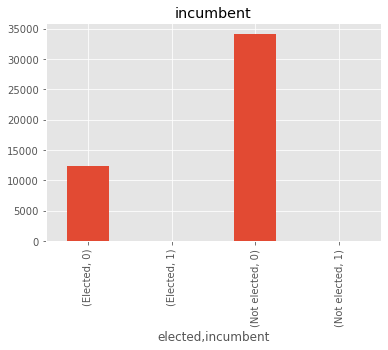

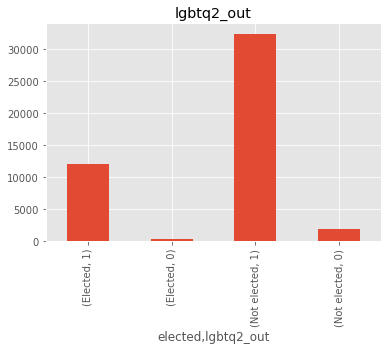

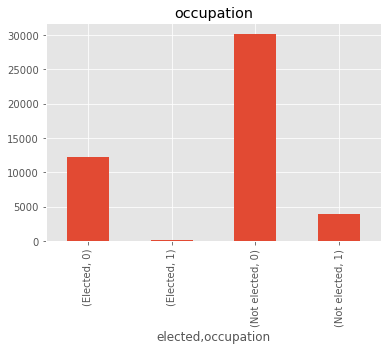

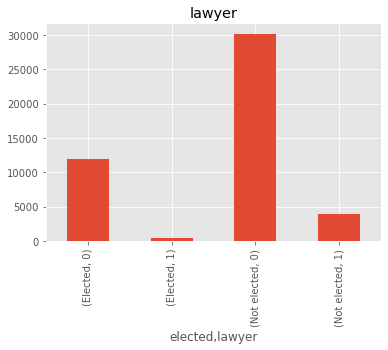

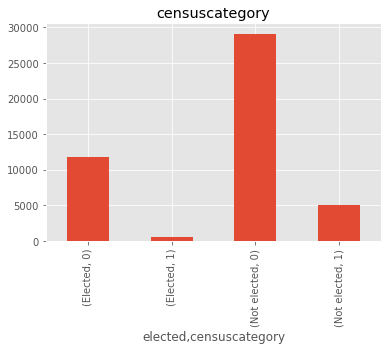

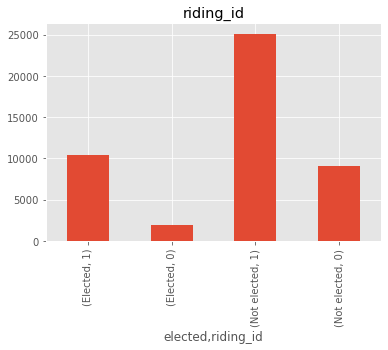

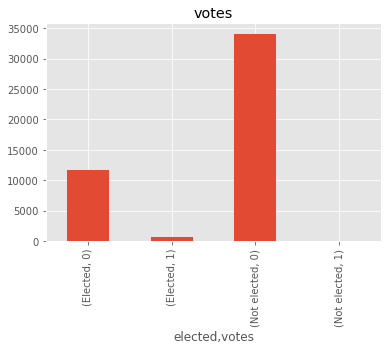

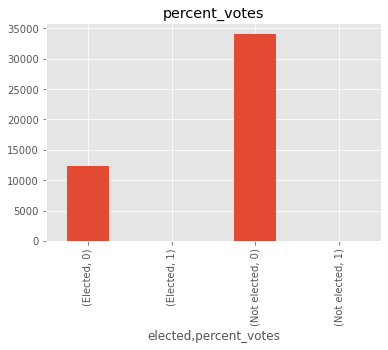

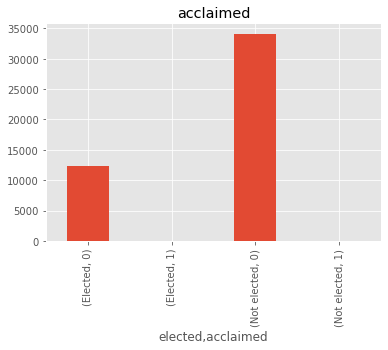

In [13]:
#we need to find relationship between missing columns with target column
plt.style.use('ggplot')
#copy dataset to data  having null values
for feature in features_with_na:
    data=df.copy()
#make value of variable 1 if column value is null otherwise 0
    data[feature]=np.where(data[feature].isnull(),1,0)
    if feature!='country_birth' and feature!='birth_year':
#calculate mean target column value for missing values
        data.loc[:,[feature,'elected']]\
        .groupby('elected')\
        .value_counts()\
        .plot(kind='bar')
        plt.title(feature)
        plt.show()
        
        

the null values of Features rigid id,lgbtq2, depending on the targeted columns, and the percentage of null values is high.

In [24]:
###grouping the numerical variables and categorical variables
data_num=[features for features in df.columns if df[features].dtypes!="O"]
data_num=[features for features in df.columns if df[features].dtypes!="O"]
data_cat=[features for features in df.columns if df[features].dtypes=="O"]
datan=df[data_num]
datacat=df[data_cat]
#find feature that contain year information - temporal variable
data_year=[feature for feature in data_num if 'year' in feature]
print(data_cat)

['type_elxn', 'elected', 'candidate_name', 'edate', 'incumbent', 'gender', 'country_birth', 'lgbtq2_out', 'indigenousorigins', 'occupation', 'lawyer', 'censuscategory', 'riding', 'province', 'acclaimed', 'switcher', 'multiple_candidacy', 'party_raw', 'party_minor_group', 'party_major_group', 'gov_party_raw', 'gov_minor_group', 'gov_major_group']


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


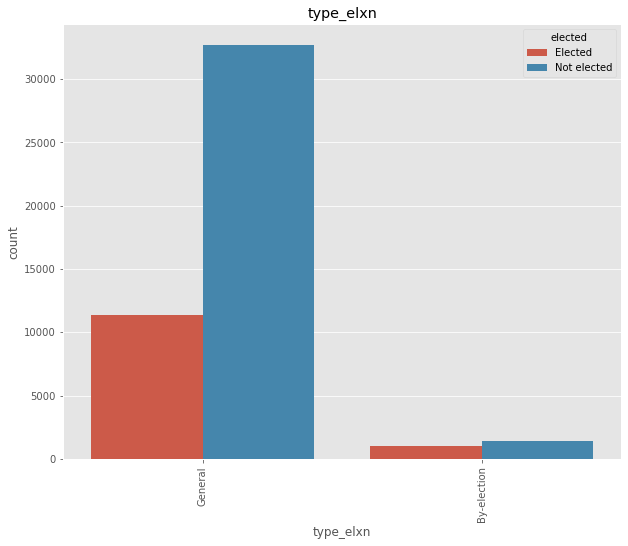

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


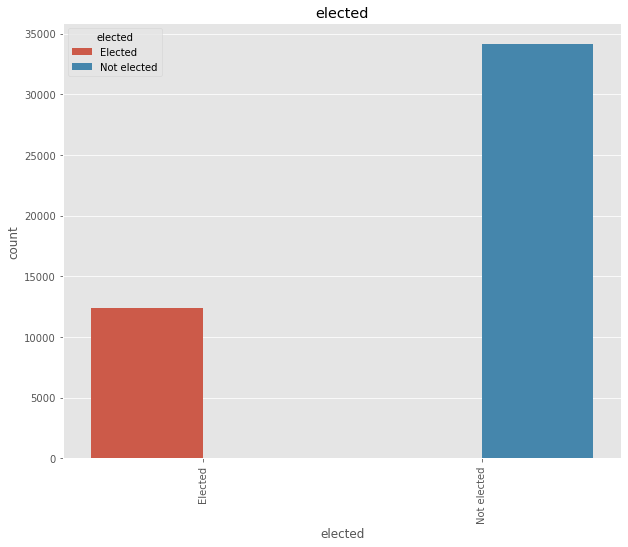

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


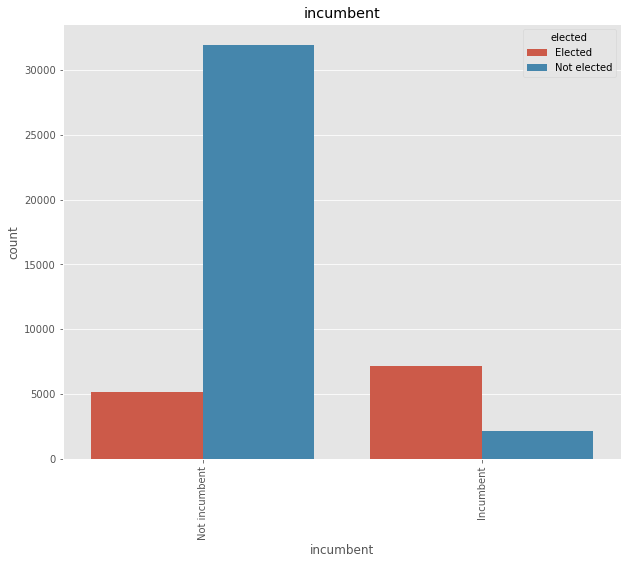

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


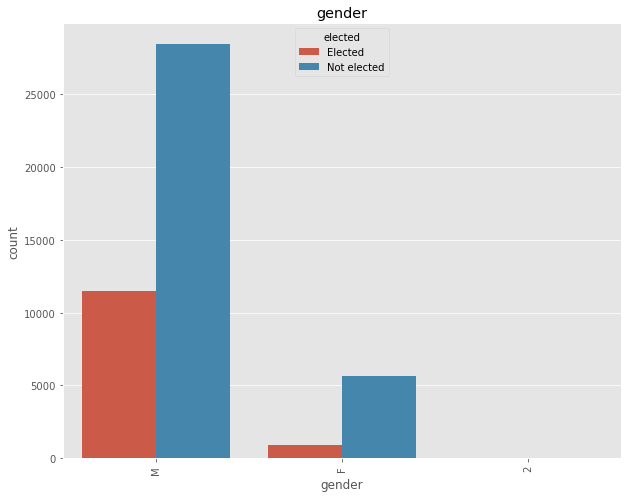

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


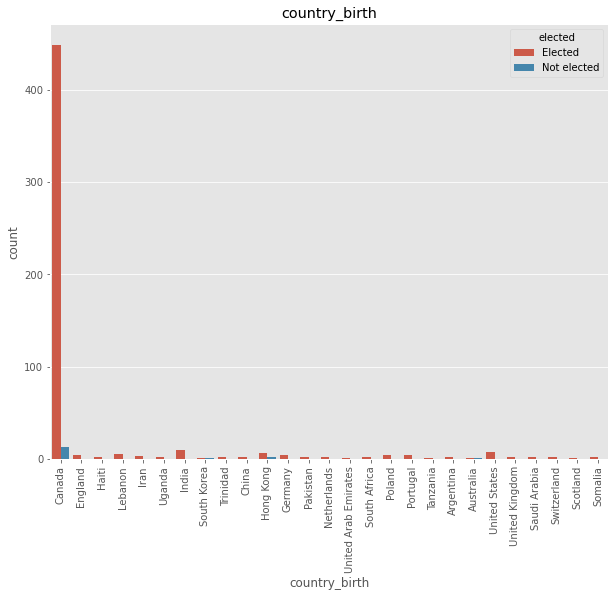

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


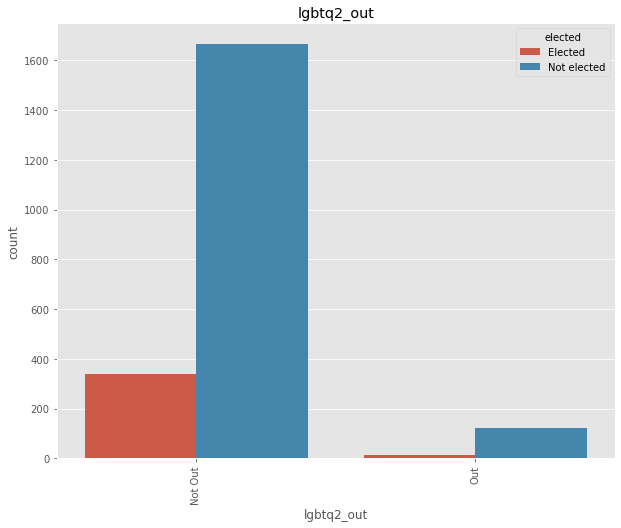

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


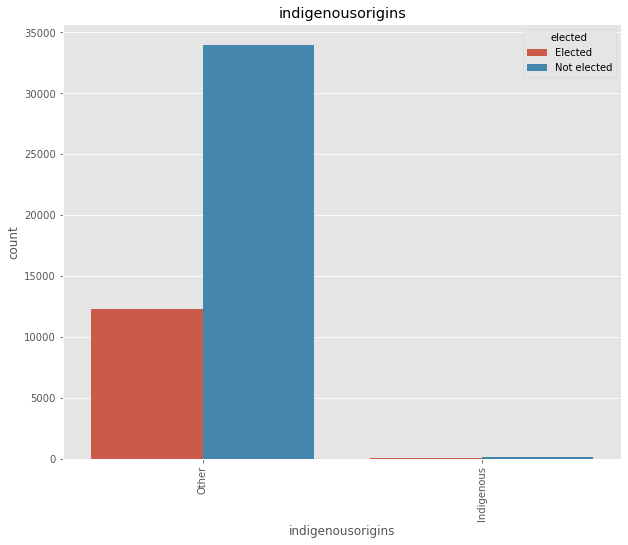

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


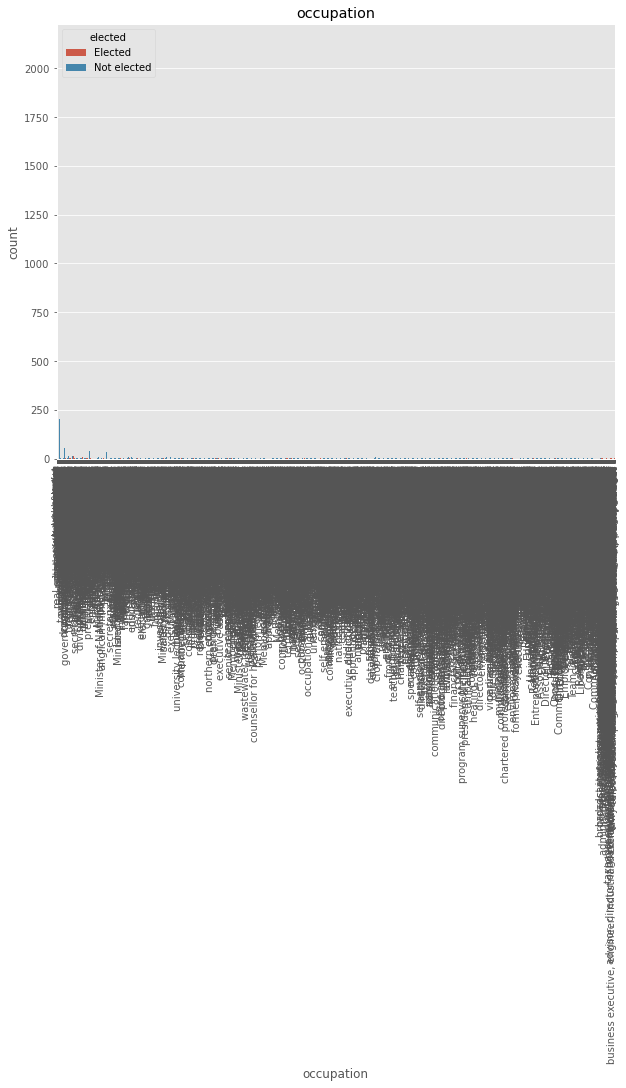

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


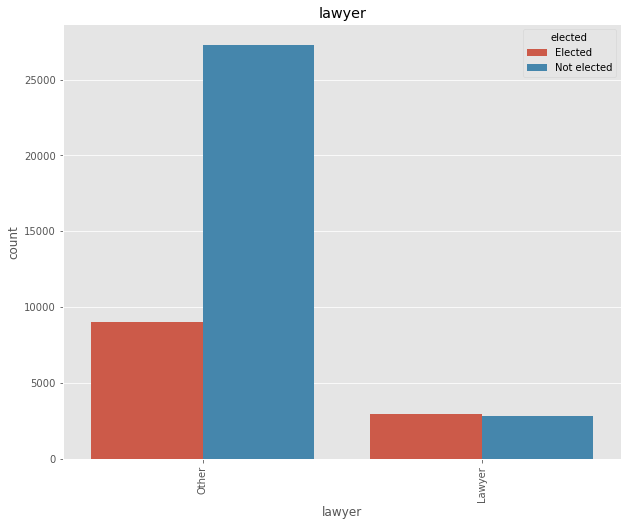

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


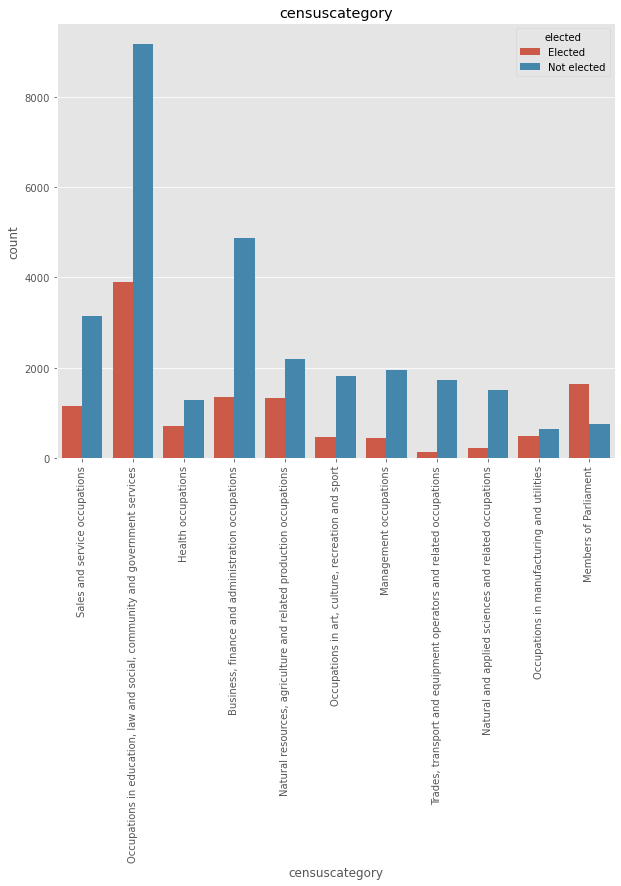

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


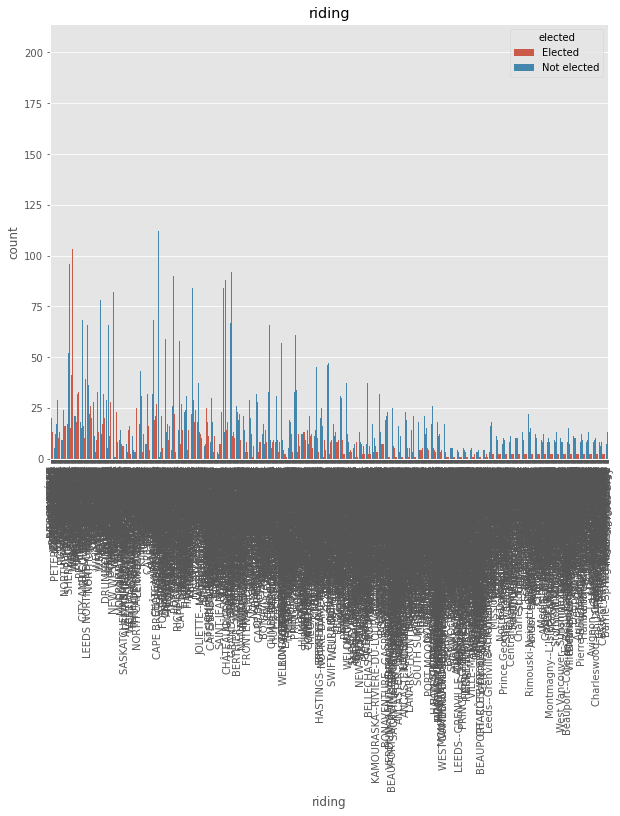

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


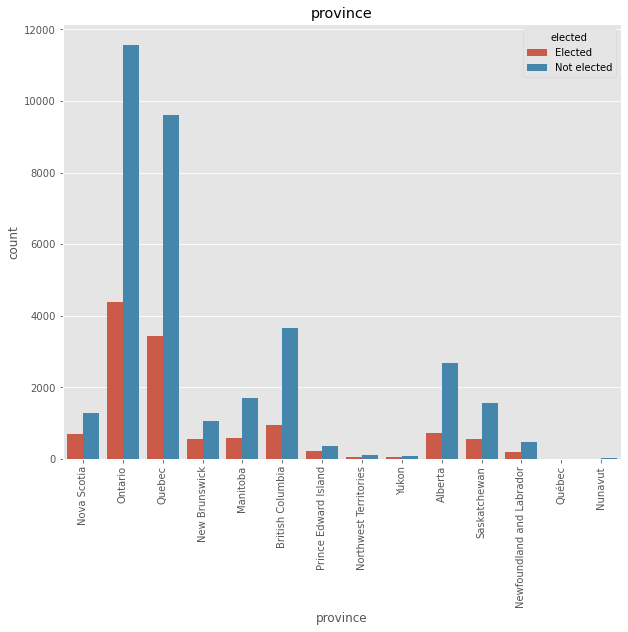

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


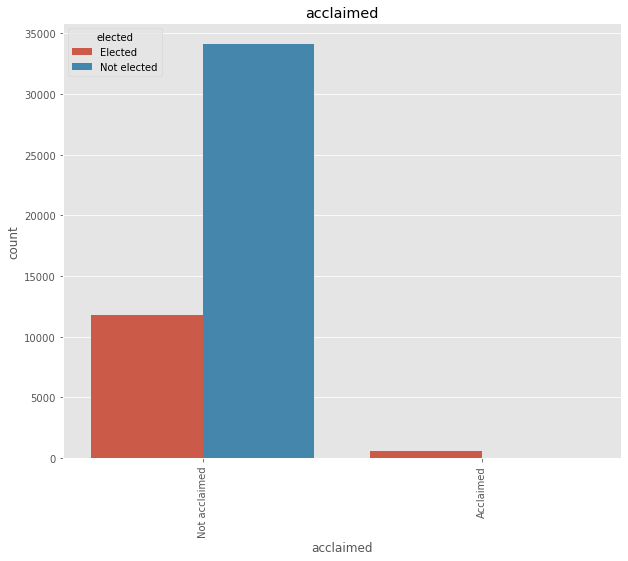

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


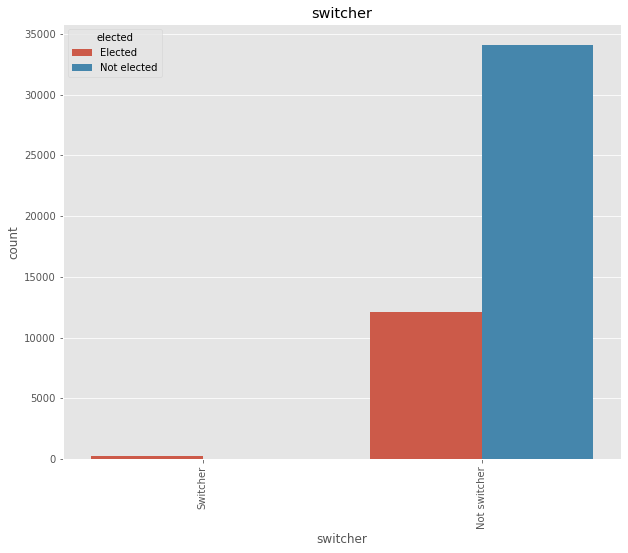

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


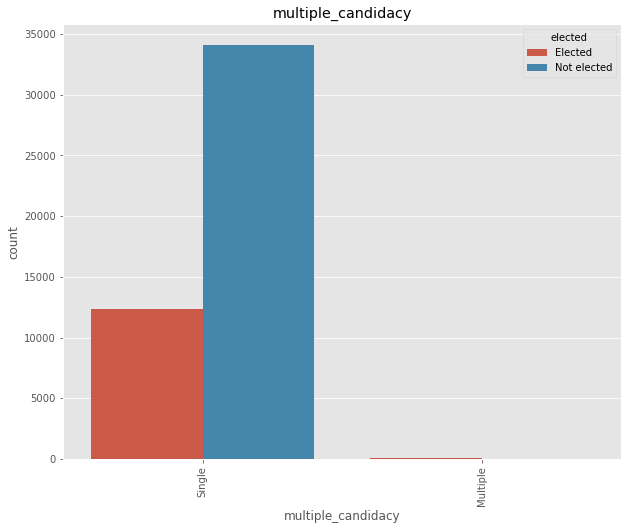

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


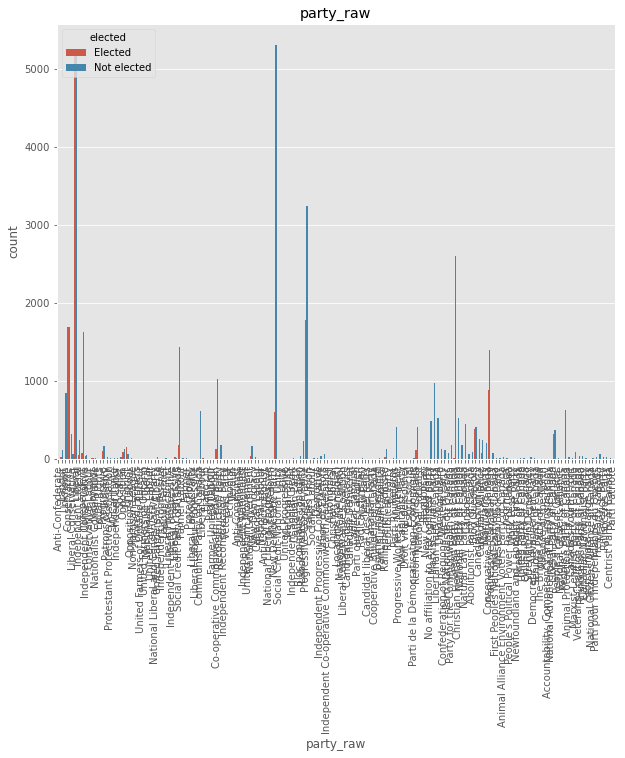

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


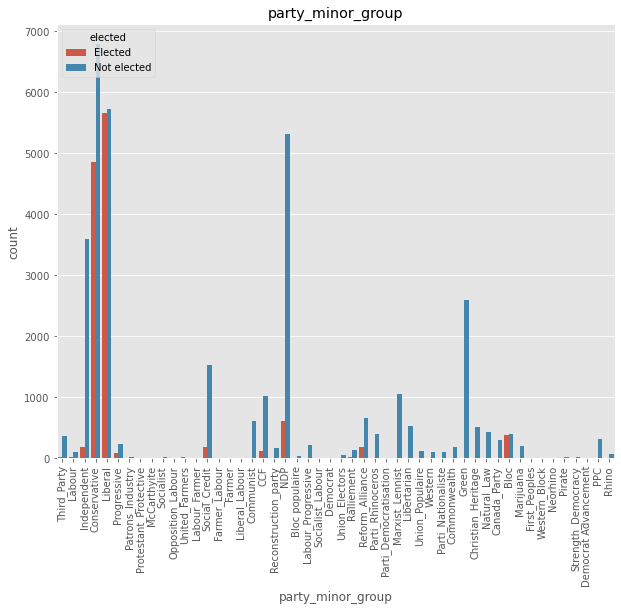

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


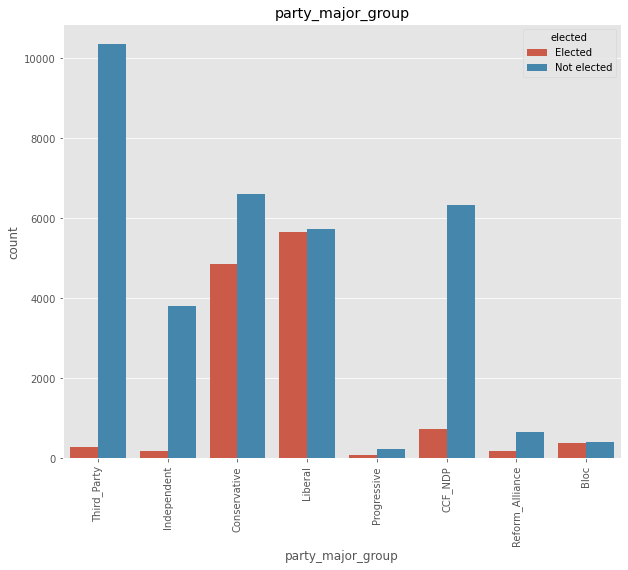

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


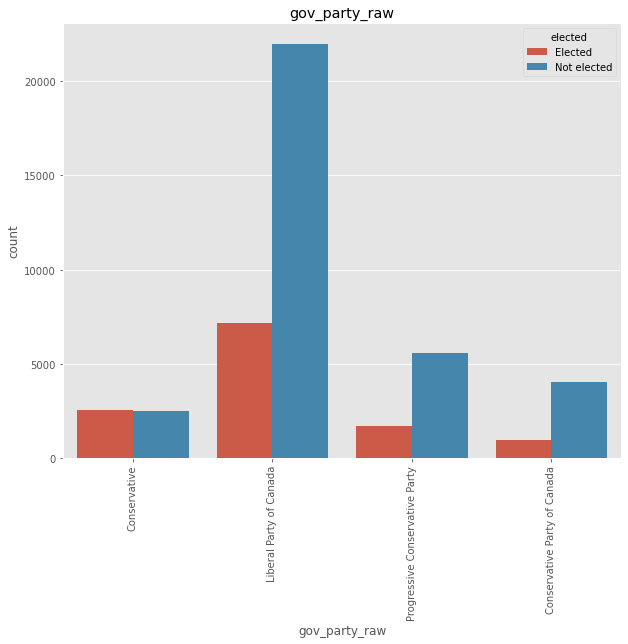

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


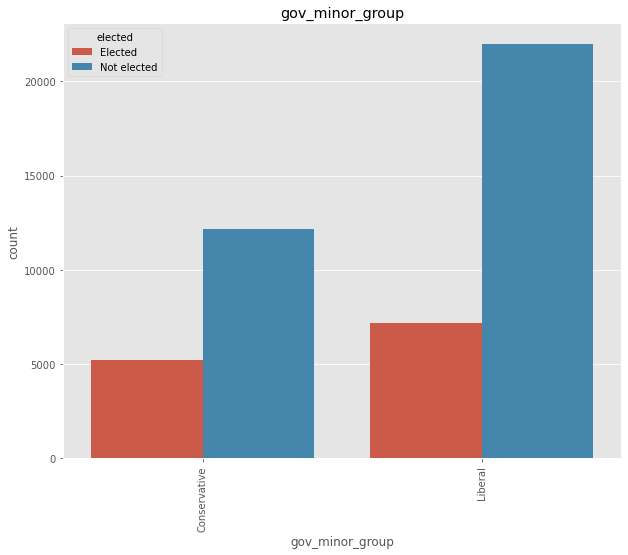

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


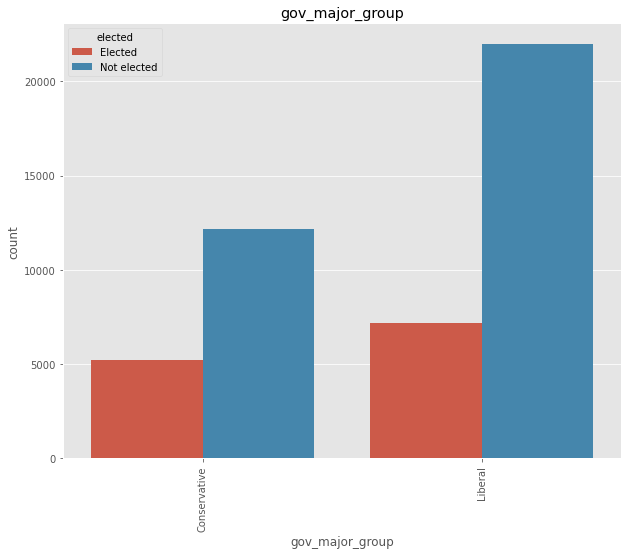

In [24]:
for i in datacat.columns:
    if i!='candidate_name' and i!='edate':
        plt.figure(figsize=(10,8))
        sns.countplot(datacat[i],hue=datacat['elected'])
        plt.title(i)
        plt.xticks(rotation=90)
        plt.show()

from the grapph we can see, general election takeplace manytimes and the by-election a few in numbers. There are almost 30% of candidates who are elected and 70% are not elected, the effect of incumbency raised the numbers of elected members but there was only few candidates who were willing to participate in each election even after failing or winning one. There was a huge difference in the gender of politicians. female candidates, who participated in election was less in numbers than males. Most of the politicians were from canada. Indigeniousorigins are higher in number. Almost all the Politicians who were lawyers are elected in the all election.In case of other occupation, elected candidates are high in number, but it compared to not elected the percentage of elected is very low. ontario and quebec province conducted more elections than other province. Not acclaimed and  not party switching politicians are high in number but politicians who were acclaimed and a partyswitcher having 99% of winning chance. and also candidates having multiple candidacy must be selected any of the election.90% of politicians in liberal party were elected followed by conservative party. liberal party contains more politicians.

descrete variable count 1


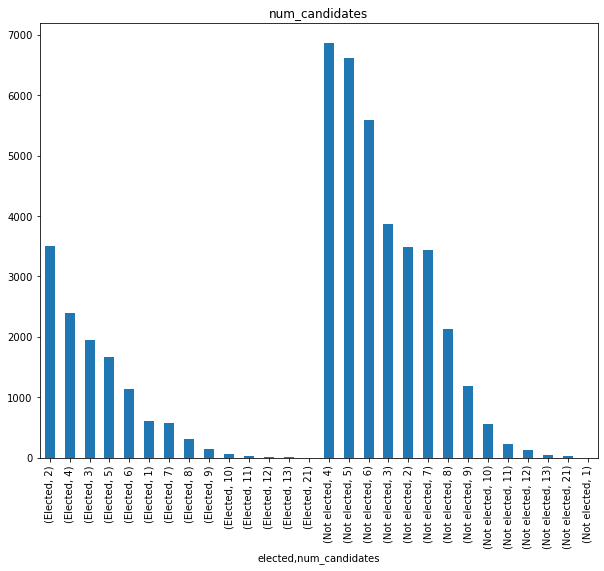

In [26]:
#Numerical variables
descrete_feature=[feature for feature in data_num if len(df[feature].unique())<25 and feature not in data_year+['id']]
print('descrete variable count {}'.format(len(descrete_feature)))
df[descrete_feature].head()
# find relatiob betweenw descrete feature and target column
for feature in descrete_feature:
    data=df.copy()
    plt.figure(figsize=(10,8))
    data.loc[:,[feature,'elected']]\
        .groupby('elected')\
        .value_counts()\
        .plot(kind='bar')
    plt.title(feature)
    plt.show()

elected candidated are propotionally related to number of candidates.

In [27]:
#continuous feature
continuous_feature=[feature for feature in data_num if feature not in descrete_feature+data_year+['id']]
print('continuous feature{}' .format(len(continuous_feature)))
print(continuous_feature)

continuous feature4
['parliament', 'riding_id', 'votes', 'percent_votes']


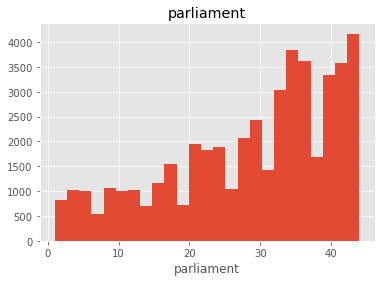

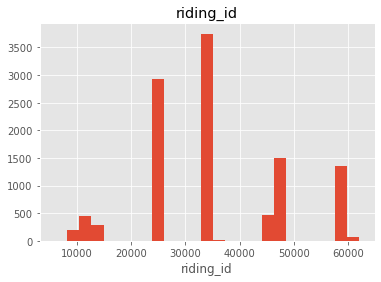

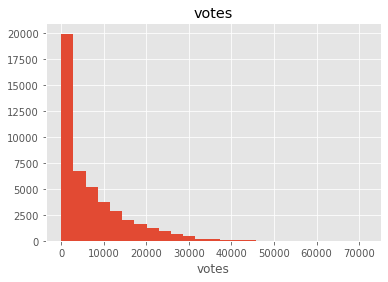

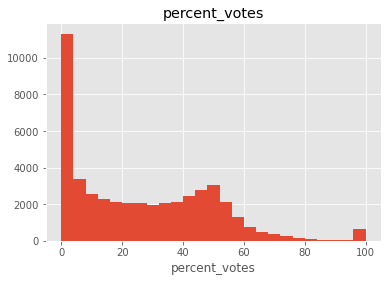

In [27]:
#analyse continuos feature.
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [8]:
## let's analyse the continues variable with time impacting on target variables
col=['parliament', 'votes', 'percent_votes']

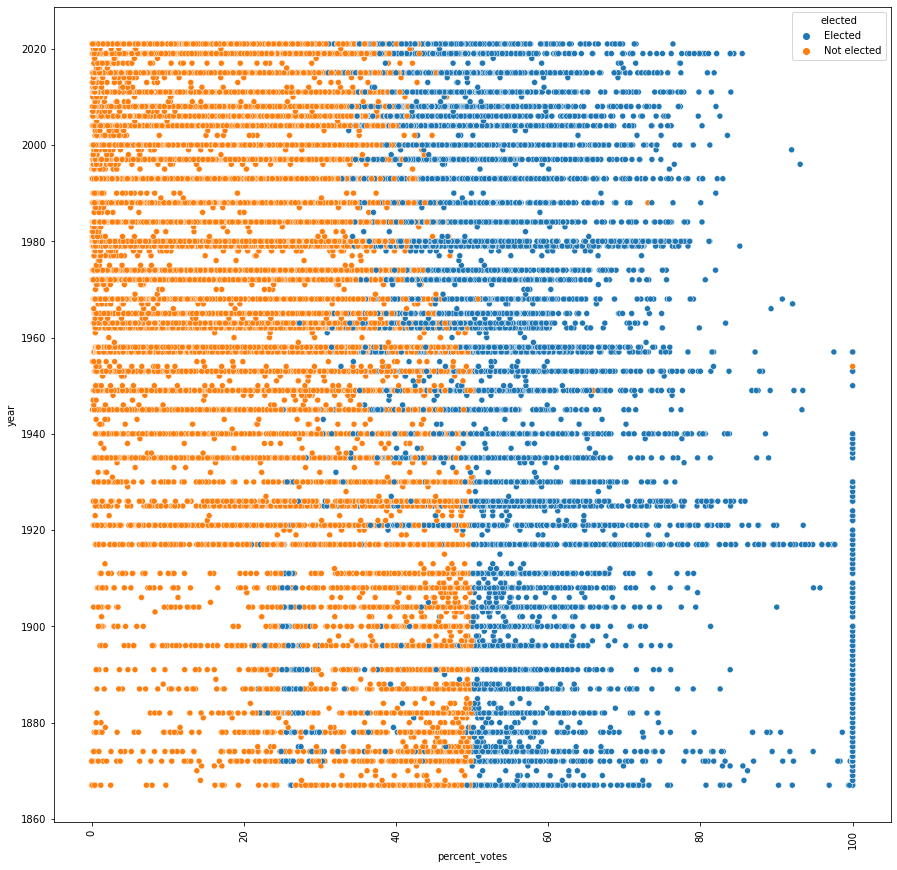

In [5]:
data=df.copy()
plt.figure(figsize=(15,15))
sns.scatterplot(data=data,x='percent_votes',y='year',hue='elected')
plt.xticks(rotation=90)
plt.show()

 if a candidate having the percentage of votes greater than 50, the winning chance of candidates is very high.

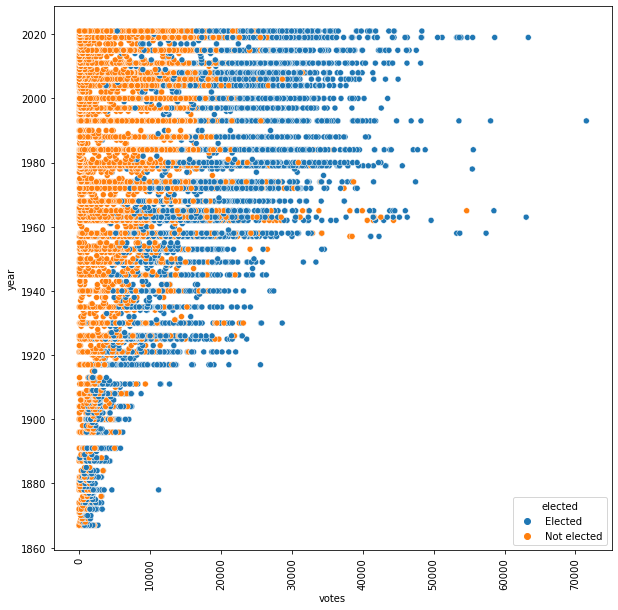

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='votes',y='year',hue='elected')
plt.xticks(rotation=90)
plt.show()

The trends of the voting in graph shows that if the voting is greater than 20,000  then the chance of being elected is high.

In [6]:
df1=pd.read_csv("federal-candidates-2021-10-20.csv",index_col='year')#converting index as month for graph to get x axis as month

C:\Users\HP\AppData\Local\Temp\ipykernel_16156\189216501.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("federal-candidates-2021-10-20.csv",index_col='year')#converting index as month for graph to get x axis as month


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

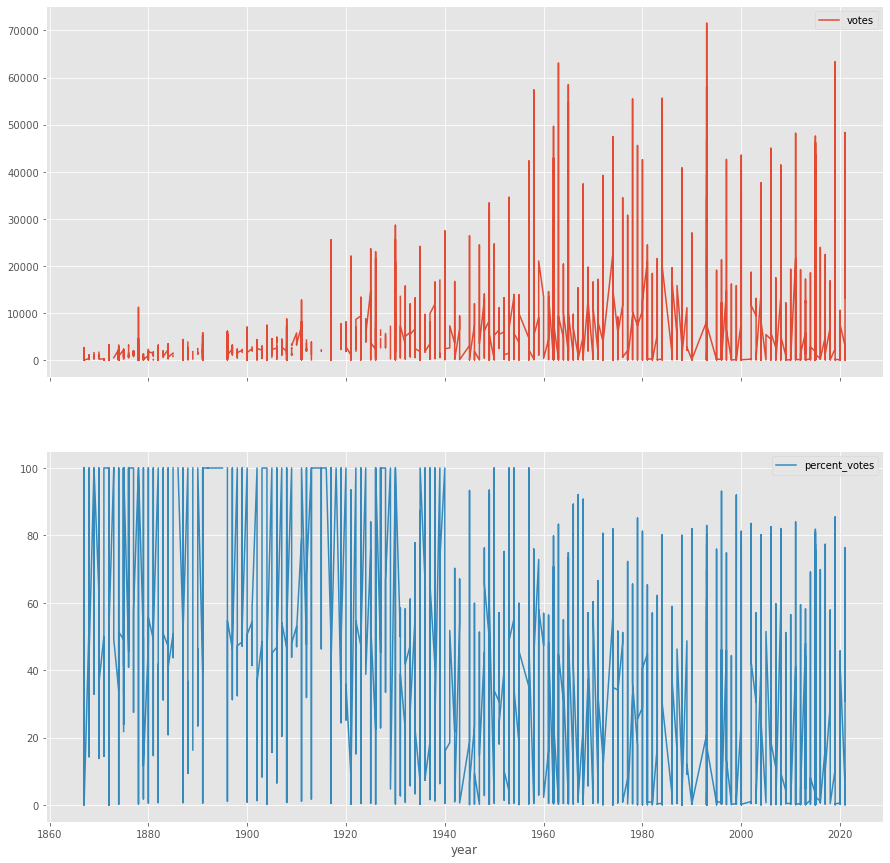

In [30]:
df1[['votes','percent_votes']].plot(kind='line',subplots=True,figsize=(15,15))

The votes are in increasing sequence over the times, but percentage of votes being decreasing manner as per the times, this is contradiction. so we can infer that at the early stage of election in canda, everyone who are eligible for voting used their oppurtunity, but there may be some unusual eligibility criteria than what is now.

<Figure size 1080x720 with 0 Axes>

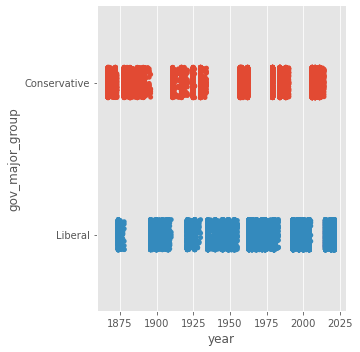

In [32]:
plt.figure(figsize=(15,10))
sns.catplot(data=df, x="year", y="gov_major_group")
plt.show()

This graphs shows the political behaviour of canada over the times. At the earlier stage of election conservative party had the majority but after a while, from 1925 liberal party got the maority.

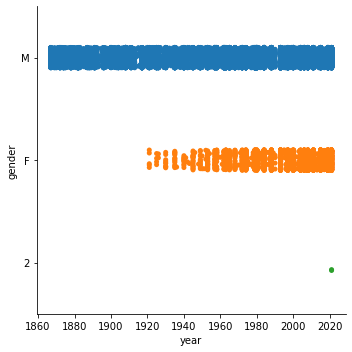

In [17]:
sns.catplot(data=df,x='year',y='gender')

Here, at the early stage of election only male politicians are participated. but at the last election there were equal number of male and female participants. this shows the influence of thoughts on the people.